## Описание проекта
 Клиентам компании федерального оператора сотовой связи предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей оператора сотовой связи: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


###  Откройте файл с данными и изучите общую  информацию

#### Таблица CALLS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

calls = pd.read_csv('/datasets/calls.csv')
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


#### Вывод по таблице CALLS

Использую *.info()*, *.sample()*.
В других столбцах визуально никаких аномалий не вижу.

#### Таблица INTERNET

In [2]:
internet = pd.read_csv('/datasets/internet.csv',index_col=0)
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


####  Вывод по таблице INTERNET

Использую *.info()*, *.sample()*.

В столбцах визуально никаких аномалий не вижу.

#### Таблица MESSAGES

In [3]:
messages = pd.read_csv('/datasets/messages.csv')
messages.info()
messages.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
64024,1277_701,2018-03-16,1277
48511,1214_310,2018-09-17,1214
60579,1266_187,2018-08-30,1266
90689,1375_489,2018-12-08,1375
81944,1344_8,2018-09-25,1344
94962,1390_0,2018-10-25,1390
79188,1331_411,2018-09-27,1331
59298,1259_165,2018-11-14,1259
19568,1086_254,2018-06-13,1086
11633,1048_279,2018-09-07,1048


####  Вывод по таблице MESSAGES

Использую *.info()*, *.sample()*.

В столбцах визуально никаких аномалий не вижу.

#### Таблица TARIFFS

In [4]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.info()
tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


####  Вывод по таблице TARIFFS

Использую .info().

В столбцах визуально никаких аномалий не вижу.

#### Таблица USERS

In [5]:
users = pd.read_csv('/datasets/users.csv')
users.info()
users.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
271,1271,69,2018-11-13,Челябинск,Аурелия,Чижова,2018-07-14,ultra
439,1439,62,NaN,Орёл,Евгения,Афонина,2018-06-30,smart
449,1449,55,NaN,Москва,Дана,Новикова,2018-07-16,smart
183,1183,20,NaN,Владивосток,Снежана,Озерова,2018-07-12,smart
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart
489,1489,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
162,1162,63,NaN,Москва,Марта,Минаева,2018-10-09,smart
287,1287,39,NaN,Севастополь,Вениамин,Мишин,2018-09-23,smart
210,1210,33,NaN,Севастополь,Евфросинья,Серебрякова,2018-07-29,smart
429,1429,54,NaN,Санкт-Петербург,Джулия,Белякова,2018-01-26,smart


####  Вывод по таблице USERS

Использую *.info()*, *.sample()*.

В столбце **churn_date** есть пропуски.В этом столбце указана дата прекращения пользования тарифами. Получается, что пропуск образовался из-за того, что тариф ещё действовал на момент выгрузки данных.

В остальных столбцах визуально никаких аномалий не вижу.

### Подготовьте данные

####  Обработка пропусков и аномалий

In [6]:
display(calls.isna().mean(),'calls')
display(internet.isna().mean(),'internet')
display(messages.isna().mean(),'messages')
display(tariffs.isna().mean(), 'tariffs')
display(users.isna().mean(),'users')

display(calls['duration'].value_counts(normalize=True))
display(internet['mb_used'].value_counts(normalize=True))

calls.loc[calls['duration'] == 0, 'duration'] = 1 
calls['duration'] = calls['duration'].fillna(0)
calls.tail(10)

internet.loc[internet['mb_used'] == 0, 'mb_used'] = 1 
internet['mb_used'] = internet['mb_used'].fillna(0)

id           0.0
call_date    0.0
duration     0.0
user_id      0.0
dtype: float64

'calls'

id              0.0
mb_used         0.0
session_date    0.0
user_id         0.0
dtype: float64

'internet'

id              0.0
message_date    0.0
user_id         0.0
dtype: float64

'messages'

messages_included        0.0
mb_per_month_included    0.0
minutes_included         0.0
rub_monthly_fee          0.0
rub_per_gb               0.0
rub_per_message          0.0
rub_per_minute           0.0
tariff_name              0.0
dtype: float64

'tariffs'

user_id       0.000
age           0.000
churn_date    0.924
city          0.000
first_name    0.000
last_name     0.000
reg_date      0.000
tariff        0.000
dtype: float64

'users'

0.00     0.195516
4.49     0.000701
5.50     0.000701
6.15     0.000696
6.38     0.000696
           ...   
27.02    0.000005
26.19    0.000005
25.34    0.000005
27.13    0.000005
24.28    0.000005
Name: duration, Length: 2871, dtype: float64

0.00      0.131182
197.56    0.000060
447.30    0.000060
335.91    0.000060
108.95    0.000054
            ...   
72.49     0.000007
846.22    0.000007
429.17    0.000007
899.03    0.000007
483.87    0.000007
Name: mb_used, Length: 70003, dtype: float64

####  Вывод по обработке пропусков и аномалиям

 В таблицах *calls*, *messages*, *tariffs*,*internet* нет пропущенных значений.

В таблице users есть пропуски в столбце **churn_date**.В этом столбце указана дата прекращения пользования тарифами. Получается, что пропуск образовался из-за того, что тариф ещё действовал на момент выгрузки данных. Для анализа обрабатывать их необязательно.

В столбце **duration** таблицы *calls* 19% звонков с нулевой длительностью.В столбце **mb_used** таблицы *internet* есть 13% строк с нулевым интернет-трафиком потраченным за сессию.Но, учитывая, что было сказано: "«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута." Заменяю звонки длительностью 0 на 1. Заменяю строки с 0-м объемом интернет-трафика на 1.

<font color='purple'> Поскольку у нас указано, что провайдер округляет всё в большую сторону и секунды разговоров и интернет-трафик, и учитывая, то что этих данных 19 % я приняла решение округлить их до единицы.Преподаватель написал, что он тоже бы округлил до единицы. Решили, что провайдер 'очень жадный' и тарифицирует даже доли секунд. Это могут быть очень короткие звонки, когда делаешь посыл вызова, передумал, но соединение на долю секунд состоялось или сбои сети.  </font>

In [7]:
calls['duration'] = np.ceil(calls['duration'])
display(calls.sample(2))
internet['mb_used'] = np.ceil(internet['mb_used'])
internet.head(2)

,id,call_date,duration,user_id
59995,1151_20,2018-10-17,7.0,1151
150803,1377_1650,2018-04-03,2.0,1377


,id,mb_used,session_date,user_id
0,1000_0,113.0,2018-11-25,1000
1,1000_1,1053.0,2018-09-07,1000


<font color='purple'> Округлила длительность звонков и интернет-трафик до ближайшего целого числа.  </font>

####  Подготовка таблиц к объединению

Создаю столбец с месяцем для таблицы CALLS,INTERNET,MESSAGES

In [8]:
calls['month'] = pd.to_datetime(calls['call_date']).dt.month
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1.0,1000,7
1,1000_1,2018-08-17,1.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


In [9]:
internet['month'] = pd.to_datetime(internet['session_date']).dt.month
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,113.0,2018-11-25,1000,11
1,1000_1,1053.0,2018-09-07,1000,9
2,1000_2,1198.0,2018-06-25,1000,6
3,1000_3,551.0,2018-08-22,1000,8
4,1000_4,303.0,2018-09-24,1000,9


In [10]:
messages['month'] = pd.to_datetime(messages['message_date']).dt.month
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Сгруппирую таблицы CALLS,INTERNET,MESSAGES

In [11]:
calls_grouped_1 = calls.groupby(['user_id', 'month']).agg({'duration':'sum'}).reset_index()
calls_grouped_1.columns = ['user_id', 'month','duration_of_calls']
calls_grouped_2 = calls.groupby(['user_id', 'month']).agg({'duration':'count'}).reset_index()
calls_grouped_2.columns = ['user_id', 'month','count_of_calls']
calls_grouped = calls_grouped_1.merge(calls_grouped_2,on = ['user_id','month'], how='outer')
calls_grouped.sample(10)

,user_id,month,duration_of_calls,count_of_calls
367,1057,10,985.0,130
1927,1308,5,216.0,29
1993,1318,10,555.0,90
2199,1353,7,380.0,53
2524,1396,11,525.0,68
2670,1421,8,395.0,46
2938,1463,11,264.0,41
2570,1404,9,144.0,19
2355,1376,10,500.0,60
2818,1441,11,82.0,11


Сделала две сводные таблицы для calls, в одной посчитала длительность звонков, в другой количество звонков и соединила их вместе.

In [12]:
internet_grouped = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()
internet_grouped.sample(10)
internet_grouped[internet_grouped['user_id']==1021]

,user_id,month,mb_used
145,1021,4,4358.0
146,1021,5,16108.0
147,1021,6,22287.0
148,1021,7,20041.0
149,1021,8,17502.0
150,1021,9,18323.0
151,1021,10,20235.0
152,1021,11,28203.0
153,1021,12,27658.0


Сделала сводную таблицу для internet,посчитала объем,используемых МБ.

In [13]:
messages_grouped = messages.groupby(['user_id', 'month']).agg({'id': 'count'}).reset_index()
messages_grouped.sample(10)
messages_grouped.columns = ['user_id', 'month','count_of_messages']
messages_grouped[messages_grouped['user_id']==1111]


,user_id,month,count_of_messages
609,1111,11,2
610,1111,12,4


Сделала сводную таблицу для messages, посчитала кол-во смс-сообщений.

####  Объединение таблиц

In [14]:
df=calls_grouped.merge(internet_grouped,on=['user_id','month'],how='outer').merge(messages_grouped, on=['user_id','month'],how='outer').fillna(0)

df=df.merge(users,on='user_id',how='left').merge(tariffs,left_on='tariff',right_on='tariff_name',how='left')

Объединила таблицы users, сгрупированные calls_grouped,internet_grouped,messages_grouped. Также добавила в объединение таблицу tariff.Получила один датафрейм df.

In [15]:
df.isna().mean()
# df['duration_of_calls'] = df['duration_of_calls'].fillna(0)
# df['count_of_calls'] = df['count_of_calls'].fillna(0)
# df['mb_used'] = df['mb_used'].fillna(0)
# df['count_of_messages'] = df['count_of_messages'].fillna(0)
# df = df.dropna(subset=['month','age'])
# df.isna().mean()

user_id                  0.000000
month                    0.000000
duration_of_calls        0.000000
count_of_calls           0.000000
mb_used                  0.000000
count_of_messages        0.000000
age                      0.000000
churn_date               0.941817
city                     0.000000
first_name               0.000000
last_name                0.000000
reg_date                 0.000000
tariff                   0.000000
messages_included        0.000000
mb_per_month_included    0.000000
minutes_included         0.000000
rub_monthly_fee          0.000000
rub_per_gb               0.000000
rub_per_message          0.000000
rub_per_minute           0.000000
tariff_name              0.000000
dtype: float64

После объединения в датасесте df образовались пропуски. Часть из них-те строки, где отсутсвовала практически вся информация, их было 40, я полностью удалила.Также удалила 8 строк с пропущенными значениями в столбце 'month'

Другие пропуски, которые присутствовали лишь частично в некоторых столбцах заменила на 0.Таких строк было 48.   

<font color='purple'> Объединила таблицы более лучшим способом, при котором пропусков в данных не возникло. </font>

####  Вычисление данных для каждого пользователя.

In [16]:
pd.set_option('display.max_columns', None)
df.sample(2)

,user_id,month,duration_of_calls,count_of_calls,mb_used,count_of_messages,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
2575,1405,11,348.0,42.0,12787.0,67.0,54,NaN,Набережные Челны,Элина,Белова,2018-10-08,ultra,1000,30720,3000,1950,150,1,1,ultra
1467,1234,12,863.0,113.0,28530.0,91.0,54,NaN,Магнитогорск,Роксана,Алексеева,2018-12-19,ultra,1000,30720,3000,1950,150,1,1,ultra


•	количество сделанных звонков и израсходованных минут разговора по месяцам в столбцах **duration_of_calls** и **count_of_calls** соответственно;

•	количество отправленных сообщений по месяцам в столбце **count_of_messages**;

•	объем израсходованного интернет-трафика по месяцам в столбце **mb_used**;

In [17]:
df['calls_over'] = df['duration_of_calls'] - df['minutes_included']
df.loc[df['calls_over'] < 0, 'calls_over'] = 0
df['month_revenue_calls'] = df['calls_over']*df['rub_per_minute']

In [18]:
df['messages_over'] = (df['count_of_messages'] - df['messages_included'])
df.loc[df['messages_over'] < 0, 'messages_over'] = 0
df['month_revenue_messages'] = df['messages_over']*df['rub_per_message']

In [19]:
df['internet_over'] = (df['mb_used'] - df['mb_per_month_included']) / 1024
df.loc[df['internet_over'] < 0, 'internet_over'] = 0
df['internet_over'] = np.ceil(df['internet_over'])
df['month_revenue_internet'] = df['internet_over']*df['rub_per_gb']

<font color='purple'> Округлила перерасход трафика вверх. </font>

In [20]:
df['month_over'] = df['month_revenue_calls'] + df['month_revenue_messages'] + df['month_revenue_internet']

In [21]:
df['month_revenue'] = df['month_over'] + df['rub_monthly_fee']

In [22]:
df['month_revenue']=df['month_revenue'].astype(int)
df['month_over']=df['month_over'].astype(int)
df.sample(5)
df=df.drop(['age','first_name','last_name','messages_included','mb_per_month_included','minutes_included','rub_monthly_fee', 'rub_per_gb','rub_per_message','rub_per_minute','tariff_name'],axis=1)
df.sample()

,user_id,month,duration_of_calls,count_of_calls,mb_used,count_of_messages,churn_date,city,reg_date,tariff,calls_over,month_revenue_calls,messages_over,month_revenue_messages,internet_over,month_revenue_internet,month_over,month_revenue
965,1155,3,414.0,58.0,15635.0,48.0,NaN,Ставрополь,2018-01-02,smart,0.0,0.0,0.0,0.0,1.0,200.0,200,750


<font color='purple'>Сделала выручку целочисленным показателем.Удалила лишние столбцы из датасета.</font>

Помесячная выручка с каждого пользователя в столбце **month_revenue**



### Проанализируйте данные

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [23]:
df_ultra = df.query('tariff == "ultra"')
display(len(df_ultra))
df_smart = df.query('tariff == "smart"')
len(df_smart)

985

2229

Создала два датафрейма в одном пользователи тарифа 'Ультра', в другом тарифа 'Смарт'

In [24]:
values = ['duration_of_calls','count_of_messages','mb_used','month_revenue','month_over']
month_values = df.pivot_table(
    index=['tariff', 'month'],
    values=values,aggfunc='sum'
)
df_month = month_values.loc['smart']
df_month

,count_of_messages,duration_of_calls,mb_used,month_over,month_revenue
month,,,,,
1,620.0,7128.0,289972.0,5894,24594
2,1397.0,17766.0,673806.0,16533,48433
3,2453.0,30841.0,1165103.0,48400,90750
4,3443.0,42224.0,1510441.0,47586,109186
5,4762.0,56175.0,2232418.0,94344,171894
6,5478.0,66699.0,2594881.0,110560,200760
7,6784.0,84277.0,3170051.0,139991,250541
8,7905.0,101800.0,3910450.0,187289,316539
9,8746.0,114421.0,4246480.0,188370,331370


Количество сообщений,количество минут разговоров, использованный интернет-трафик и выручка для тарифа 'Смарт'  по месяцам.

In [25]:
values = ['duration_of_calls','count_of_messages','mb_used','month_revenue','month_over']
month_values = df.pivot_table(
    index=['tariff', 'month'],
    values=values, aggfunc='sum'
)
df_month = month_values.loc['ultra']
df_month

,count_of_messages,duration_of_calls,mb_used,month_over,month_revenue
month,,,,,
1,304.0,3968.0,118392.0,0,17550
2,527.0,7312.0,282920.0,600,47400
3,1195.0,18614.0,649480.0,2400,74550
4,1736.0,25854.0,926489.0,2850,110100
5,2536.0,35166.0,1298674.0,7500,138150
6,3505.0,41364.0,1591290.0,7650,171450
7,4536.0,50987.0,1867008.0,15600,193050
8,5183.0,56129.0,2096759.0,14250,222900
9,6013.0,63669.0,2210765.0,8550,232800


Количество сообщений,количество минут разговоров, использованный интернет-трафик и выручка для тарифа 'Ультра' по месяцам.

In [26]:
month_values_one = df.pivot_table(
    index=['tariff', 'month'],
    values=values,
)

t = month_values_one.pivot_table(
    index='tariff',
    values=values
)
t

,count_of_messages,duration_of_calls,mb_used,month_over,month_revenue
tariff,,,,,
smart,31.413211,397.374228,15085.107080,648.743306,1198.743306
ultra,43.714983,509.356551,18224.477581,97.737868,2047.737868


Количество сообщений,количество минут разговоров, использованный интернет-трафик и выручка в среднем необходимые пользователям каждого тарифа в месяц.

Исходя из данных больше дохода приносит тариф 'Ультра'. Пользователи тарифа 'Смарт' тратят горазда больше денег на услуги сверх тарифного плана.

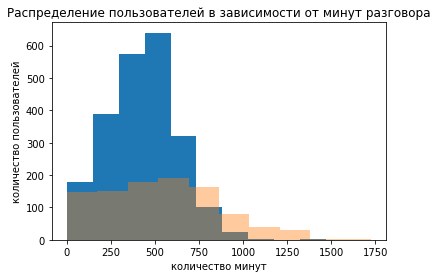

In [27]:
plt.hist(df_smart['duration_of_calls'], bins=10, label='smart')
plt.hist(df_ultra['duration_of_calls'], bins=10, label='ultra',alpha = 0.4)
plt.xlabel('количество минут')
plt.ylabel('количество пользователей')
plt.title('Распределение пользователей в зависимости от минут разговора')
plt.show()

Из распределения гистограммы видно, что пользователей тарифа 'Смарт' больше,но минут тратят больше пользователи тарифа 'Ультра'

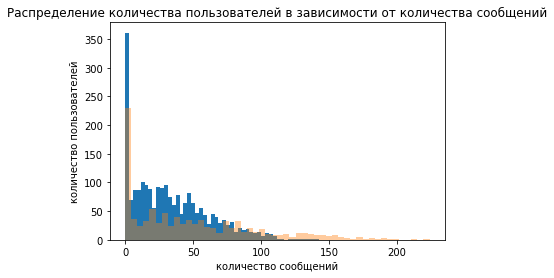

In [28]:
plt.hist(df_smart['count_of_messages'], bins=50, label='smart')
plt.hist(df_ultra['count_of_messages'], bins=50, label='ultra', alpha=0.4)
plt.xlabel('количество сообщений')
plt.ylabel('количество пользователей')
plt.title('Распределение количества пользователей в зависимости от количества сообщений')
plt.show()

Из распределения гистограммы видно, что пользователей тарифа 'Смарт' больше,но смс используют больше пользователи тарифа 'Ультра'

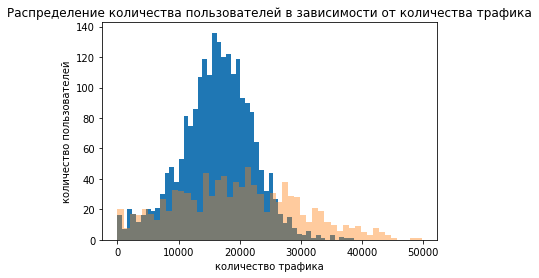

In [29]:
plt.hist(df_smart['mb_used'], bins=50, label='smart')
plt.hist(df_ultra['mb_used'], bins=50, label='ultra', alpha=0.4)
plt.xlabel('количество трафика')
plt.ylabel('количество пользователей')
plt.title('Распределение количества пользователей в зависимости от количества трафика')
plt.show()

Из распределения гистограммы видно, что пользователей тарифа 'Смарт' больше,но интернет-трафика используют больше пользователи тарифа 'Ультра'

In [30]:
variance_ultra = np.var(df_ultra[['duration_of_calls','count_of_messages','mb_used','month_revenue']], ddof = 1)
display(variance_ultra)
df_ultra[['duration_of_calls','count_of_messages','mb_used']].describe().style.format('{:.2f}')

duration_of_calls    1.061057e+05
count_of_messages    2.285266e+03
mb_used              1.019516e+08
month_revenue        1.434912e+05
dtype: float64

,duration_of_calls,count_of_messages,mb_used
count,985.00,985.00,985.00
mean,540.78,49.36,19488.70
std,325.74,47.80,10097.11
min,0.00,0.00,0.00
25%,292.00,6.00,11787.00
50%,532.00,38.00,19324.00
75%,773.00,79.00,26866.00
max,1727.00,224.00,49793.00


Посчитала дисперсию для минут звонков,сообщений и интернет трафика полтьзователей тарифа 'Ультра'.

С помощью Describe вычислила среднее и стандартное отклонение для минут звонков,сообщений и интернет трафика пользователей тарифа 'Ультра'.

In [31]:
variance_smart = np.var(df_smart[['duration_of_calls','count_of_messages','mb_used','month_revenue']], ddof = 1)
display(variance_smart)
df_smart[['duration_of_calls','count_of_messages','mb_used']].describe().style.format('{:.2f}')

duration_of_calls    3.797477e+04
count_of_messages    7.968130e+02
mb_used              3.457199e+07
month_revenue        6.904582e+05
dtype: float64

,duration_of_calls,count_of_messages,mb_used
count,2229.00,2229.00,2229.00
mean,429.45,33.38,16237.18
std,194.87,28.23,5879.80
min,0.00,0.00,0.00
25%,291.00,10.00,12662.00
50%,435.00,28.00,16540.00
75%,560.00,51.00,20078.00
max,1471.00,143.00,38627.00


Посчитала дисперсию для минут звонков,сообщений и интернет трафика полтьзователей тарифа 'Смарт'.

С помощью Describe вычислила среднее и стандартное отклонение для минут звонков,сообщений и интернет трафика пользователей тарифа 'Смарт'.

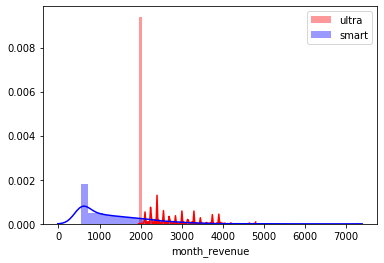

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
tariff = ['ultra','smart']
palette = {'ultra':'red','smart':'blue'}
for tariff in tariff:
    new_df = df.query('tariff == @tariff')
    sns.distplot(new_df['month_revenue'],label=tariff,color=palette[tariff])
legend=plt.legend()    

<font color='purple'>График выручки компании с разбиением по тарифам.Из графика видно,что тариф 'Ультра' приносит больше денег чем тариф 'Смарт'.</font>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Базовые статистические параметры получены. Приведены все необходимые графики. Здорово, что графики для одинаковых услуг тарифов приведены на одном рисунке. Так удобнее сравнивать тарифы. Также можно привести график по выручке компании с разбиением по тарифу. 

</div>

### Проверьте гипотезы


**Нулевая гипотеза:** Cредняя выручка пользователей тарифов 'Ультра' и 'Смарт' не различается

**Альтернативная гипотеза:** Средняя выручка пользователей тарифов 'Ультра' и 'Смарт' различается

In [33]:
display(np.var(df_smart['month_revenue']))
display(np.var(df_ultra['month_revenue']))

alpha = 0.05

results = st.ttest_ind(
    df_smart['month_revenue'], 
    df_ultra['month_revenue'],equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")   
    

690148.4005880315

143345.5641732588

p-значение: 1.2496710269965528e-233
Отвергаем нулевую гипотезу


<font color='purple'>Поскольку дисперсия общей выручки по тарифу 'Смарт' больше дисперсии общей выручки по  тарифу 'Ультра',то при проведении проверки гипотезы через T-критерий Стьюдента укажем параметр equal_var = False.
</font>

Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

**Нулевая гипотеза:** Cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

**Альтернативная гипотеза:** Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [34]:
df_moscow = df.query('city == "Москва"')                   
df_other_cities = df.query('city != "Москва"')

In [35]:
variance_moscow = np.var(df_moscow['month_revenue'], ddof = 1)
display(variance_moscow)

variance_other_cities = np.var(df_other_cities['month_revenue'], ddof = 1)
variance_other_cities

567332.0773309007

663465.6530958336

In [36]:
alpha = 0.05
results = st.ttest_ind(
    df_moscow['month_revenue'],
    df_other_cities['month_revenue'], equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.560259602740345
Не получилось отвергнуть нулевую гипотезу


<font color='purple'>Поскольку дисперсия общей выручки для Москвы меньше дисперсии общей выручки для остальных регионов,то при проведении проверки гипотезы через T-критерий Стьюдента укажем параметр equal_var = False.
</font>

Cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

### Вывод

Cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. 

Тариф 'Ультра' приносит больше денег. Пользователи тарифа 'Смарт' приносят денег меньше, даже при том, что очень много тратят на услуги сверх тарифного плана. Можно предложить пользователям тарифа 'Смарт' тариф с более расширенным пакетом услуг, по большей цене. Но не такой дорогой,как 'Ультра' и с не настолько расширенным пакетом услуг.